In [2]:
import torch
torch.manual_seed(1337)
import torch.nn as nn
import torch.optim as optim

In [3]:
X=torch.randn(200,4)

w=torch.tensor([[0.8],[0.6],[0.7],[0.5]])
b=torch.tensor([-1.0])
noise=torch.randn(200,1)*0.3
proba=torch.sigmoid(X@w+b+noise)
y=(proba>0.5).float()

X.shape

torch.Size([200, 4])

In [4]:
y.shape

torch.Size([200, 1])

In [5]:
class RiskNN(nn.Module):
    def __init__(self):
        super(RiskNN, self).__init__()
        self.fc1 = nn.Linear(4, 8)  
        self.output = nn.Linear(8, 1)   
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x): 
        x = self.relu(self.fc1(x))
        x = self.output(x)              
        return self.sigmoid(x)

In [6]:
model = RiskNN()
print(model)

RiskNN(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [7]:
loss_function=nn.BCELoss()
optimiser = optim.SGD(model.parameters(), lr=0.05)
print(model)

RiskNN(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [12]:
epochs = 15
losses = []

for epoch in range(epochs):
    optimiser.zero_grad()
    y_pred = model(X)
    loss = loss_function(y_pred, y)
    
    loss.backward()
    optimiser.step()
    
    losses.append(loss.item())
    print(f"Epoch {epoch+1:02d}: Loss={loss.item():.4f}")

Epoch 01: Loss=0.5095
Epoch 02: Loss=0.5071
Epoch 03: Loss=0.5048
Epoch 04: Loss=0.5025
Epoch 05: Loss=0.5003
Epoch 06: Loss=0.4980
Epoch 07: Loss=0.4958
Epoch 08: Loss=0.4936
Epoch 09: Loss=0.4915
Epoch 10: Loss=0.4894
Epoch 11: Loss=0.4873
Epoch 12: Loss=0.4852
Epoch 13: Loss=0.4832
Epoch 14: Loss=0.4811
Epoch 15: Loss=0.4791


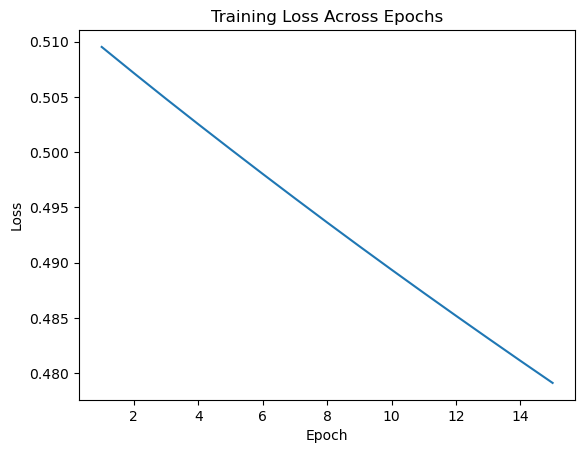

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1, epochs+1), losses)  # plot(x,y)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Across Epochs")
plt.show()